In [1]:
import pandas as pd 
import numpy as np
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Baca DataFrame dari dataset_komentar_instragram_cyberbulling.csv

In [2]:
df = pd.read_excel('versi 4.0.2.xlsx')

In [3]:
df

,Sentiment,content,score,reviewCreatedVersion
0,Negative,Biasanya saya scan QR code di lobby kantor set...,1,4.0.2
1,Negative,Setelah di-update versi terbaru kok malah gak ...,1,4.0.2
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...,1,4.0.2
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...,1,4.0.2
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda...",1,4.0.2
...,...,...,...,...
1943,Negative,aku gak bis masuknya,5,4.0.2
1944,Negative,Ko gx bisa login.,5,4.0.2
1945,Negative,Koq gak mau kebuka,5,4.0.2
1946,Positive,Semoga sehat semua,5,4.0.2


In [4]:
df_skripsi = df.drop(['score','reviewCreatedVersion'],axis = 1)

In [5]:
df_skripsi

,Sentiment,content
0,Negative,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...
1943,Negative,aku gak bis masuknya
1944,Negative,Ko gx bisa login.
1945,Negative,Koq gak mau kebuka
1946,Positive,Semoga sehat semua


# Mendeteksi Positif & Negatif

In [6]:
df_skripsi.Sentiment.value_counts()

Negative    1467
Positive     481
Name: Sentiment, dtype: int64

# Menampilkan Bagian kolom pada data

In [7]:
df_skripsi.columns = ['label','text']

In [8]:
df_skripsi['text_real'] = df_skripsi.text

# Menampilkan DataFrame

In [9]:
df_skripsi

,label,text,text_real
0,Negative,Biasanya saya scan QR code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
1943,Negative,aku gak bis masuknya,aku gak bis masuknya
1944,Negative,Ko gx bisa login.,Ko gx bisa login.
1945,Negative,Koq gak mau kebuka,Koq gak mau kebuka
1946,Positive,Semoga sehat semua,Semoga sehat semua


# Mengubah Huruf menjadi kecil

In [10]:
df_skripsi['text'] = df_skripsi['text'].str.lower()
print('Case Folding Result : \n')
print(df_skripsi['text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    biasanya saya scan qr code di lobby kantor set...
1    setelah di-update versi terbaru kok malah gak ...
2    sekarang update terbaru malah ga bisa masuk ad...
3    gimana ini aplikasi kok gak bisa di gunakan. s...
4    sebelumnya ada pilihan warga negara, saya suda...
Name: text, dtype: object






# Menghapus special karakter dan url

In [11]:
def remove_text_special(text):
    # hapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # hapus non ASCII (emot, bahasa china dll)
    text = text.encode('ascii', 'replace').decode('ascii')
    # hapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove URL 
    return text.replace("http://", " ").replace("https://", " ")
df_skripsi['text'] = df_skripsi.text.astype('str')                
df_skripsi['text'] = df_skripsi['text'].apply(remove_text_special)




In [12]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan. s...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
1943,Negative,aku gak bis masuknya,aku gak bis masuknya
1944,Negative,ko gx bisa login.,Ko gx bisa login.
1945,Negative,koq gak mau kebuka,Koq gak mau kebuka
1946,Positive,semoga sehat semua,Semoga sehat semua


# Menghapus elongasi 


In [13]:
#remove kata yang sengaja dipanjangkan
# seperti bisaaaaaaa -> bisa
def spell(word):
    if re.search(r'([a-zA-Z])\1{2,}', word):
        rword = re.sub(r'([a-zA-Z])\1{2,}','\\1', word)
        return rword
    else:
        return word
df_skripsi['text'] = df_skripsi['text'].apply(spell)



In [14]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan. s...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
1943,Negative,aku gak bis masuknya,aku gak bis masuknya
1944,Negative,ko gx bisa login.,Ko gx bisa login.
1945,Negative,koq gak mau kebuka,Koq gak mau kebuka
1946,Positive,semoga sehat semua,Semoga sehat semua


# menghapus tanda baca

In [15]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df_skripsi['text'] = df_skripsi['text'].apply(remove_punctuation)



In [16]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
1943,Negative,aku gak bis masuknya,aku gak bis masuknya
1944,Negative,ko gx bisa login,Ko gx bisa login.
1945,Negative,koq gak mau kebuka,Koq gak mau kebuka
1946,Positive,semoga sehat semua,Semoga sehat semua


# menghapus enter tab

In [17]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df_skripsi['text'] = df_skripsi['text'].apply(remove_whitespace_LT)


In [18]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
1943,Negative,aku gak bis masuknya,aku gak bis masuknya
1944,Negative,ko gx bisa login,Ko gx bisa login.
1945,Negative,koq gak mau kebuka,Koq gak mau kebuka
1946,Positive,semoga sehat semua,Semoga sehat semua


# menghapus spasi yang terlalu banyak

In [19]:
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df_skripsi['text'] = df_skripsi['text'].apply(remove_whitespace_multiple)

# menghapus karakter single seperti a b c d

In [20]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_skripsi['text'] = df_skripsi['text'].apply(remove_singl_char)

In [21]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
1943,Negative,aku gak bis masuknya,aku gak bis masuknya
1944,Negative,ko gx bisa login,Ko gx bisa login.
1945,Negative,koq gak mau kebuka,Koq gak mau kebuka
1946,Positive,semoga sehat semua,Semoga sehat semua


# Membuat kolom text_token berisi kumpulan kata kata yang dipisah dengan koma

In [22]:
df_skripsi = df_skripsi.drop_duplicates()
df_skripsi = df_skripsi[['text_real','text','label']]
df_skripsi['text'] = df_skripsi['text'].str.lower()

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_skripsi['text_tokens'] = df_skripsi['text'].apply(word_tokenize_wrapper)

In [23]:
df_skripsi

,text_real,text,label,text_tokens
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya..."
...,...,...,...,...
1943,aku gak bis masuknya,aku gak bis masuknya,Negative,"[aku, gak, bis, masuknya]"
1944,Ko gx bisa login.,ko gx bisa login,Negative,"[ko, gx, bisa, login]"
1945,Koq gak mau kebuka,koq gak mau kebuka,Negative,"[koq, gak, mau, kebuka]"
1946,Semoga sehat semua,semoga sehat semua,Positive,"[semoga, sehat, semua]"


# Menghapus stopwords

In [24]:
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
df_skripsi['text_tokens_WSW'] = df_skripsi['text_tokens'].apply(stopwords_removal) 

In [25]:
list_stopwords

{'',
 'gin',
 'setibanya',
 'ngo',
 'ti',
 'gom',
 'aang',
 'in',
 'slrh',
 'udah',
 'heeeeellloooo',
 'penc',
 'rit',
 'sedikitnya',
 'and',
 'pi',
 'i',
 'wk',
 'aaa',
 'bena',
 'yup',
 'banyak',
 'dimintai',
 'percuma',
 'bara',
 'kom',
 'diberi',
 'for',
 'kagak',
 'sendirian',
 'cuihhhh',
 'ros',
 'uppppsss',
 'aplagi',
 'nan',
 'the',
 'ting',
 'dituturkan',
 'yeee',
 'kiranya',
 'sama-sama',
 'wuuuu',
 'pentingnya',
 'that',
 'pret',
 'peri',
 'yv',
 'yoiii',
 'za',
 'o',
 'amat',
 'dipunyai',
 'tur',
 'dimungkinkan',
 'amp',
 'jah',
 'ben',
 'sampai',
 'ji',
 'koit',
 'begitupun',
 'k',
 'kual',
 'omg',
 'untuk',
 'bagaimanakah',
 'ts',
 'selanjutnya',
 'bukankah',
 'wuiiih',
 'tan',
 'eeh',
 'seolah',
 'terasa',
 'terjadilah',
 'sam',
 'hmmm',
 'saatnya',
 'ditegaskan',
 'kelihatannya',
 'bageb',
 'menyeluruh',
 'sana',
 'ww',
 'artinya',
 'wkwkwk',
 'gi',
 'm',
 'terhadapnya',
 'ter',
 'selaku',
 'sebelum',
 'sekiranya',
 'jangn',
 'harusnya',
 'tandasnya',
 'sebutnya',
 'sed

In [26]:
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s..."
...,...,...,...,...,...
1943,aku gak bis masuknya,aku gak bis masuknya,Negative,"[aku, gak, bis, masuknya]","[bis, masuknya]"
1944,Ko gx bisa login.,ko gx bisa login,Negative,"[ko, gx, bisa, login]","[ko, gx, login]"
1945,Koq gak mau kebuka,koq gak mau kebuka,Negative,"[koq, gak, mau, kebuka]","[koq, kebuka]"
1946,Semoga sehat semua,semoga sehat semua,Positive,"[semoga, sehat, semua]","[semoga, sehat]"


# Distribusi frekuensi NLTK

In [27]:
def freqDist_wrapper(text):
    return FreqDist(text)

df_skripsi['text_tokens_fdist'] = df_skripsi['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df_skripsi['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(qr, 2), (code, 2), (update, 2), (biasanya, 1...
1    [(gak, 4), (bisa, 4), (dibuka, 3), (bolak, 2),...
2    [(hp, 5), (untuk, 4), (ga, 2), (masuk, 2), (aj...
3    [(gak, 4), (bisa, 3), (saya, 3), (gimana, 2), ...
4    [(saya, 4), (untuk, 4), (tidak, 4), (ada, 3), ...
Name: text_tokens_fdist, dtype: object


# Filtering (penghapusan stopwords) / normalisasi

In [28]:
from nltk.corpus import stopwords


In [29]:
list_stopwords = stopwords.words('indonesian')

In [30]:
list_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf =  RandomForestClassifier(random_state=0, max_features ='sqrt',max_depth = 100)
knn = KNeighborsClassifier(n_neighbors=7)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_features ='sqrt',max_depth = 100)
svm = SVC(degree=3)
# clf.fit(X, y)

In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

normalizad_word = pd.read_csv("colloquial-indonesian-lexicon (1).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df_skripsi['text_normalized'] = df_skripsi['text_tokens_WSW'].apply(normalized_term)


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_skripsi['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df_skripsi['text_tokens_stemmed'] = df_skripsi['text_normalized'].swifter.apply(get_stemmed_term)

4452
------------------------
scan : scan
qr : qr
code : code
lobby : lobby
kantor : kantor
pagitetapi : pagitetapi
aplikasi : aplikasi
errorscan : errorscan
melebihi : lebih
radius : radius
error : error
diupdate : diupdate
versi : versi
terbaru : baru
dibuka : buka
bolak : bolak
force : force
close : close
sayangnya : sayang
pedulilindungi : pedulilindungi
berhenti : henti
coba : coba
uninstal : uninstal
instal : instal
hasilnya : hasil
akun : akun
vaksin : vaksin
1 : 1
2 : 2
begini : begini
nyusahkan : nyusahkan
masyarakat : masyarakat
repot : repot
aplikasinya : aplikasi
perbaiki : baik
masak : masak
beli : beli
hape : hape
gara : gara
centangan : centangan
setuju : tuju
diam : diam
respon : respon
hp : hp
teman : teman
diperbaiki : baik
dipakai : pakai
seindonesia : indonesia
ganti : ganti
makan : makan
susah : susah
rakyat : rakyat
urgent : urgent
android : android
dibawah : bawah
6 : 6
support : support
pakai : pakai
5 : 5
berat : berat
pemerintah : perintah
sumbang : sumbang
do

perbaikan : baik
sisi : sisi
backendnya : backendnya
checkin : checkin
dibilang : bilang
tautan : taut
apps : apps
sampai : sampai
memilih : pilih
wnicontreng : wnicontreng
sebenarnya : benar
submit : submit
setting : setting
hptampilanukuran : hptampilanukuran
tekspilih : tekspilih
alami : alami
pembuat : buat
terimakasih : terimakasih
menginstal : menginstal
tanda : tanda
menerima : terima
isi : isi
kursor : kursor
melanjutkan : lanjut
kotak : kotak
biru : biru
8 : 8
mhn : mhn
bantuan : bantu
informasinya : informasi
tanggung : tanggung
jawab : jawab
kenapa : kenapa
lagi : lagi
hanya : hanya
kemkes : kemkes
ri : ri
menyepelakan : pelak
fix : fix
berguna : guna
emosi : emosi
buatan : buat
corporate : corporate
swasta : swasta
user : user
friendly : friendly
kakak : kakak
setujui : tuju
dadakan : dada
corona : corona
kodenya : kode
failed : failed
hemm : hemm
pusing : pusing
kepentingan : penting
13102021 : 13102021
test : test
swab : swab
pcr : pcr
negatif : negatif
covid : covid
402 

apllikasi : apllikasi
lupa : lupa
mengklik : klik
setujusimpan : setujusimpan
form : form
lebar : lebar
sopan : sopan
mengkritik : kritik
dengar : dengar
kasar : kasar
keras : keras
tangkap : tangkap
lucu : lucu
12 : 12
cek : cek
pintar : pintar
bodo : bodo
stop : stop
kebawahgak : kebawahgak
copot : copot
menyampah : sampah
utuk : utuk
kagak : kagak
merah : merah
kolomnya : kolom
diuji : uji
dirilis : rilis
10jt : 10jt
rating : rating
36 : 36
pengembangya : pengembangya
mbuka : mbuka
persaratan : sarat
kebanyakan : banyak
dibarengi : bareng
pembenahan : benah
nyentang : nyentang
kalangan : kalang
segede : gede
tronton : tronton
semut : semut
abal : abal
secan : secan
lengkapi : lengkap
najis : najis
gua : gua
bayak : bayak
scolling : scolling
berfungsi : fungsi
memenuhi : penuh
diperhatikan : perhati
terkhusus : khusus
experience : experience
ux : ux
dosis : dosis
berwarna : warna
jalan : jalan
gedung2 : gedung2
mal2 : mal2
alasan : alas
ujung2nya : ujung2nya
duit : duit
hadeeh : hade

gakeluar : gakeluar
dm : dm
diig : diig
smsnya : smsnya
pedulilindung : pedulilindung
langsung : langsung
berbobotsudah : berbobotsudah
downdload : downdload
masukdaftarini : masukdaftarini
memperkaya : kaya
niorang : niorang
jaman : jaman
sekasrang : sekasrang
hidupnya : hidup
atur : atur
aplikasingaco : aplikasingaco
dongeng : dongeng
signal : signal
sni : sni
salahkan : salah
mengaco : aco
pendataan : data
terdata : data
tolol : tolol
muak : muak
sertifkat : sertifkat
shi : shi
periksa : periksa
pengulangan : ulang
100 : 100
kalinya : kali
buar : buar
kesabaran : sabar
batas : batas
pengin : pengin
banting : banting
4x : 4x
smartphone : smartphone
blank : blank
masukkan : masuk
otd : otd
dilaksanakan : laksana
perbarui : baru
masukkin : masukkin
amateur : amateur
dibisa : bisa
bukamacet : bukamacet
privacy : privacy
heran : heran
milik : milik
kinerjanyaapa : kinerjanyaapa
keberapa : berapa
terbaca : baca
passpor : passpor
tim : tim
rekrut : rekrut
programer : programer
handal : han

digunain : digunain
menghilang : hilang
disebabkan : sebab
icon : icon
diharuskan : harus
persiapkan : siap
bosan : bosan
sesion : sesion
expired : expired
home : home
expire : expire
release : release
yahabis : yahabis
wniabis : wniabis
ajastlh : ajastlh
gimanakoq : gimanakoq
selanjutnyaapa : selanjutnyaapa
tampilannya : tampil
ditinjau : tinjau
validasi : validasi
kelas : kelas
dirjen : dirjen
menangani : tangan
ahlinya : ahli
komputer : komputer
arah : arah
warung : warung
lapak2 : lapak2
konsultasi : konsultasi
kehapus : hapus
rumit : rumit
dioperasikan : operasi
diverifikasi : verifikasi
pengertiannya : erti
pedulilindungiak : pedulilindungiak
sertifikatvaksin : sertifikatvaksin
bulantrs : bulantrs
aku : aku
kerestardh : kerestardh
sertifikatnyagi : sertifikatnyagi
bisa : bisa
darilokasi : darilokasi
jabingan : jabingan
coek : coek
ketidaknyamanan : ketidaknyamanan
tak : tak
suuw : suuw
privasinya : privasi
akhirny : akhirny
atik : atik
sekian : sekian
klr : klr
swalayan : swalaya

iniko : iniko
tingkatan : tingkat
kwalitas : kwalitas
maluin : maluin
ibuk : ibuk
tambah : tambah
inbug : inbug
gimanamohon : gimanamohon
perbaikisoalnya : perbaikisoalnya
action : action
diinstal : diinstal
uinstal : uinstal
disuara : suara
kelola : kelola
duluan : duluan
sebenerny : sebenerny
kalaw : kalaw
instan : instan
freekalaw : freekalaw
kenakan : kena
biaya : biaya
berbisnis : bisnis
didunia : dunia
kalinik : kalinik
moll : moll
daftr : daftr
240dpi : 240dpi
game : game
international : international
indikator : indikator
kerabat : kerabat
erat : erat
id : id
ceritanya : cerita
memperbaharui : baharu
1dan2 : 1dan2
negaranggak : negaranggak
berubahjadi : berubahjadi
lindungitolong : lindungitolong
ini : ini
penyempurnaan : sempurna
dicekout : dicekout
maj : maj
bambang : bambang
inibikin : inibikin
bijak : bijak
sia : sia
dipilih : pilih
ajaterimah : ajaterimah
perintahtlh : perintahtlh
masyarakatuntukvaksindan : masyarakatuntukvaksindan
kepada : kepada
kesehatansdhpedulimasyara

memfotocopynya : memfotocopynya
pertinggal : tinggal
jenuh : jenuh
mempedulikan : peduli
berlayar : layar
mempuni : pun
ekonomi : ekonomi
tmpat : tmpat
bintang5 : bintang5
kreatifitas : kreatifitas
kegampangan : gampang
lama-lama : lama
etiket : etiket
pcare : pcare
terinput : terinput
ketidak : tidak
sinkronan : sinkron
penarikan : tari
pengeluaran : keluar
callcentreemailtlp : callcentreemailtlp
seminggu : minggu
dow : dow
hari : hari
sab : sab
sel : sel
kekampus : kampus
responding : responding
ayolah : ayo
gakbisa : gakbisa
motif : motif
kasuh : kasuh
daftrkan : daftrkan
tergantung : gantung
pergunakan : guna
disana : sana
bis : bis
dashboard : dashboard
syifa : syifa
berusia : usia
14 : 14
mepengkapi : mepengkapi
banar : banar
seterfikat : seterfikat
malihat : malihat
lainnyasaya : lainnyasaya
marasa : marasa
unjuk : unjuk
print : print
buswaynya : buswaynya
mengribet : mengribet
contohvaksin : contohvaksin
1x : 1x
sebelumnyakenapa : sebelumnyakenapa
yapadahal : yapadahal
sebelumy

setipikat : setipikat
gade : gade
penggadean : penggadean
pengisian : isi
kg : kg
tinggak : tinggak
sendiri : sendiri
gmnasdngkn : gmnasdngkn
didepan : depan
map : map
isian : isi
dugunakan : dugunakan
ribetkiraiin : ribetkiraiin
makiin : makiin
inieh : inieh
lainsetelah : lainsetelah
katany : katany
vaksintapi : vaksintapi
keluargimana : keluargimana
lancartapi : lancartapi
astaga : astaga
menyatakan : nyata
bagustetapi : bagustetapi
lagitidak : lagitidak
aaja : aaja
smpi : smpi
bstlng : bstlng
memudahkn : memudahkn
masyarakattmksh : masyarakattmksh
meluluh : luluh
updatenya : updatenya
800 : 800
chekinmasa : chekinmasa
autmakin : autmakin
loginselalu : loginselalu
outalhasil : outalhasil
turunin : turunin
intal : intal
hellp : hellp
menyutujui : menyutujui
persayaratannya : persayaratannya
haarrggh : haarrggh
10menit : 10menit
daftarnya : daftar
1606 : 1606
kewarganegaan : kewarganegaan
persyaratanmalah : persyaratanmalah
ajastuck : ajastuck
sajagmn : sajagmn
paya : paya
sengsara : s

layout : layout
diawal : awal
birunya : biru
checkbox : checkbox
kload : kload
riwayatnya : riwayat
berarti : arti
salahnya : salah
didata : data
hphanya : hphanya
19dgn : 19dgn
232sedangkn : 232sedangkn
116 : 116
232 : 232
bisastlah : bisastlah
diemtdk : diemtdk
perubahanmohon : perubahanmohon
koreksi : koreksi
tggl : tggl
tglnya : tglnya
bareng2 : bareng2
rewie : rewie
1updatan : 1updatan
2kadang : 2kadang
lainya : lai
3menu : 3menu
tulalid : tulalid
4tambahin : 4tambahin
menghapus : hapus
menyediakan : sedia
pengawasan : awas
bocor : bocor
lagikalau : lagikalau
nodrop : nodrop
antusias : antusias
jerih : jerih
pahala : pahala
daru : daru
tuhan : tuhan
maha : maha
kuasa : kuasa
putus : putus
thank : thank
laili : laili
signature : signature
mendapatakan : mendapatakan
whattsup : whattsup
kegera : gera
assalamualaikumtrimakasih : assalamualaikumtrimakasih
pelayanannyasmoga : pelayanannyasmoga
slalujangan : slalujangan
2trims : 2trims
menambah : tambah
gabung : gabung
diplaystore : dip

tiktok : tiktok
kurangi : kurang
micin : micin
kapasitasorg : kapasitasorg
rajin-rajin : rajin
outstanding : outstanding
terbukabaiknya : terbukabaiknya
mendekati : dekat
sajaaplikasi : sajaaplikasi
berkaitan : kait
14102021 : 14102021
membawa : bawa
pedulilindungisaya : pedulilindungisaya
indonesiatrus : indonesiatrus
terintegrasi : integrasi
obat : obat
perawatan : awat
covidnya : covidnya
inginkankalo : inginkankalo
terkaitatas : terkaitatas
keluargasemoga : keluargasemoga
sip : sip
dicari : cari
sistemmakasihmohon : sistemmakasihmohon
screnshot : screnshot
thickbox : thickbox
tetkirim : tetkirim
bukan : bukan
sangatt : sangatt
mudahh : mudahh
hebat : hebat
bohong : bohong
terbaiksangat : terbaiksangat
pedulilindungigak : pedulilindungigak
repot-repot : repot
berubahisinya : berubahisinya
iniyasaya : iniyasaya
inimungkin : inimungkin
perkembangan : kembang
bilang : bilang
smart : smart
vacsin : vacsin
asmudi : asmudi
october : october
dapatkan : dapat
baguscuma : baguscuma
kalowarna

Pandas Apply:   0%|          | 0/1945 [00:00<?, ?it/s]

In [33]:
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW,text_tokens_fdist,text_normalized,text_tokens_stemmed
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","{'biasanya': 1, 'saya': 1, 'scan': 1, 'qr': 2,...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","[scan, qr, code, lobby, kantor, pagitetapi, ap..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc...","{'setelah': 1, 'diupdate': 1, 'versi': 1, 'ter...","[diupdate, versi, terbaru, dibuka, bolak, forc...","[diupdate, versi, baru, buka, bolak, force, cl..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,...","{'sekarang': 1, 'update': 1, 'terbaru': 1, 'ma...","[terbaru, centangan, setuju, diam, respon, hp,...","[baru, centangan, tuju, diam, respon, hp, tema..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn...","{'gimana': 2, 'ini': 2, 'aplikasi': 1, 'kok': ...","[aplikasi, downlod, centa, setujutapi, maksudn...","[aplikasi, downlod, centa, setujutapi, maksud,..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s...","{'sebelumnya': 1, 'ada': 3, 'pilihan': 1, 'war...","[pilihan, warga, negara, klik, wni, centang, s...","[pilih, warga, negara, klik, wni, centang, tuj..."
...,...,...,...,...,...,...,...,...
1943,aku gak bis masuknya,aku gak bis masuknya,Negative,"[aku, gak, bis, masuknya]","[bis, masuknya]","{'aku': 1, 'gak': 1, 'bis': 1, 'masuknya': 1}","[bis, masuknya]","[bis, masuk]"
1944,Ko gx bisa login.,ko gx bisa login,Negative,"[ko, gx, bisa, login]","[ko, gx, login]","{'ko': 1, 'gx': 1, 'bisa': 1, 'login': 1}","[kok, enggak, login]","[kok, enggak, login]"
1945,Koq gak mau kebuka,koq gak mau kebuka,Negative,"[koq, gak, mau, kebuka]","[koq, kebuka]","{'koq': 1, 'gak': 1, 'mau': 1, 'kebuka': 1}","[kok, kebuka]","[kok, buka]"
1946,Semoga sehat semua,semoga sehat semua,Positive,"[semoga, sehat, semua]","[semoga, sehat]","{'semoga': 1, 'sehat': 1, 'semua': 1}","[semoga, sehat]","[moga, sehat]"


# Menampilkan kembali gabungan data

In [34]:
def merge_again(text):
    return ' '.join(text)

In [35]:
df_skripsi['done_text'] = df_skripsi['text_tokens_stemmed'].apply(merge_again)
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW,text_tokens_fdist,text_normalized,text_tokens_stemmed,done_text
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","{'biasanya': 1, 'saya': 1, 'scan': 1, 'qr': 2,...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","[scan, qr, code, lobby, kantor, pagitetapi, ap...",scan qr code lobby kantor pagitetapi aplikasi ...
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc...","{'setelah': 1, 'diupdate': 1, 'versi': 1, 'ter...","[diupdate, versi, terbaru, dibuka, bolak, forc...","[diupdate, versi, baru, buka, bolak, force, cl...",diupdate versi baru buka bolak force close say...
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,...","{'sekarang': 1, 'update': 1, 'terbaru': 1, 'ma...","[terbaru, centangan, setuju, diam, respon, hp,...","[baru, centangan, tuju, diam, respon, hp, tema...",baru centangan tuju diam respon hp teman baik ...
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn...","{'gimana': 2, 'ini': 2, 'aplikasi': 1, 'kok': ...","[aplikasi, downlod, centa, setujutapi, maksudn...","[aplikasi, downlod, centa, setujutapi, maksud,...",aplikasi downlod centa setujutapi maksud kemar...
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s...","{'sebelumnya': 1, 'ada': 3, 'pilihan': 1, 'war...","[pilihan, warga, negara, klik, wni, centang, s...","[pilih, warga, negara, klik, wni, centang, tuj...",pilih warga negara klik wni centang tuju syara...
...,...,...,...,...,...,...,...,...,...
1943,aku gak bis masuknya,aku gak bis masuknya,Negative,"[aku, gak, bis, masuknya]","[bis, masuknya]","{'aku': 1, 'gak': 1, 'bis': 1, 'masuknya': 1}","[bis, masuknya]","[bis, masuk]",bis masuk
1944,Ko gx bisa login.,ko gx bisa login,Negative,"[ko, gx, bisa, login]","[ko, gx, login]","{'ko': 1, 'gx': 1, 'bisa': 1, 'login': 1}","[kok, enggak, login]","[kok, enggak, login]",kok enggak login
1945,Koq gak mau kebuka,koq gak mau kebuka,Negative,"[koq, gak, mau, kebuka]","[koq, kebuka]","{'koq': 1, 'gak': 1, 'mau': 1, 'kebuka': 1}","[kok, kebuka]","[kok, buka]",kok buka
1946,Semoga sehat semua,semoga sehat semua,Positive,"[semoga, sehat, semua]","[semoga, sehat]","{'semoga': 1, 'sehat': 1, 'semua': 1}","[semoga, sehat]","[moga, sehat]",moga sehat


In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
tfid = TfidfVectorizer(
    min_df = 3,
    max_df = 0.10,
    ngram_range = (1,2)
)


In [40]:
count_vect = CountVectorizer(
    min_df = 3,
    max_df = 0.10,
    ngram_range = (1,2)
)

In [41]:
tfid_result = tfid.fit_transform(df_skripsi["done_text"]).toarray()
tfid_df = pd.DataFrame(tfid_result, columns = tfid.get_feature_names())
tfid_df.columns = ["word_" + str(x) for x in tfid_df.columns]
tfid_df.index = df_skripsi.index
# new_data = pd.concat([, tfid_df], axis=1)

In [42]:
tfid_df.columns

Index(['word_10', 'word_119', 'word_12', 'word_19', 'word_2021', 'word_23',
       'word_23 oktober', 'word_24', 'word_26', 'word_26 oktober',
       ...
       'word_wisata', 'word_wna', 'word_wni', 'word_wni centang',
       'word_wni muncul', 'word_wni wna', 'word_wniwna', 'word_xiaomi',
       'word_yapadahal', 'word_zona'],
      dtype='object', length=1593)

In [43]:
cvzr_result = count_vect.fit_transform(df_skripsi["done_text"]).toarray()
cvzr_df = pd.DataFrame(cvzr_result, columns = count_vect.get_feature_names())
cvzr_df.columns = ["word_" + str(x) for x in cvzr_df.columns]
cvzr_df.index = df_skripsi.index
# new_data = pd.concat([, tfid_df], axis=1)

# Menampilkan label kolom

In [44]:
kolomcv = cvzr_df.columns
kolomcv

Index(['word_10', 'word_119', 'word_12', 'word_19', 'word_2021', 'word_23',
       'word_23 oktober', 'word_24', 'word_26', 'word_26 oktober',
       ...
       'word_wisata', 'word_wna', 'word_wni', 'word_wni centang',
       'word_wni muncul', 'word_wni wna', 'word_wniwna', 'word_xiaomi',
       'word_yapadahal', 'word_zona'],
      dtype='object', length=1593)

# Menampilkan Hasil classification

In [45]:
y = df_skripsi.label

In [46]:
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y_pred, y)

In [47]:
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))


[[1350  160]
 [ 117  318]]
              precision    recall  f1-score   support

    Negative     0.8940    0.9202    0.9070      1467
    Positive     0.7310    0.6653    0.6966       478

    accuracy                         0.8576      1945
   macro avg     0.8125    0.7928    0.8018      1945
weighted avg     0.8540    0.8576    0.8553      1945



In [48]:
print('SVM  & Count Vectorizer')
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(svm, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

SVM  & Count Vectorizer
[[1394  180]
 [  73  298]]
              precision    recall  f1-score   support

    Negative     0.8856    0.9502    0.9168      1467
    Positive     0.8032    0.6234    0.7020       478

    accuracy                         0.8699      1945
   macro avg     0.8444    0.7868    0.8094      1945
weighted avg     0.8654    0.8699    0.8640      1945



In [49]:
print('SVM & TFIDF Vectorizer')
X = tfid_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(svm, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

SVM & TFIDF Vectorizer
[[1444  190]
 [  23  288]]
              precision    recall  f1-score   support

    Negative     0.8837    0.9843    0.9313      1467
    Positive     0.9260    0.6025    0.7300       478

    accuracy                         0.8905      1945
   macro avg     0.9049    0.7934    0.8307      1945
weighted avg     0.8941    0.8905    0.8818      1945



# Menampilkan hasil Naive Bayes

In [50]:
print('Naive Bayes & Count Vectorizer')
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

Naive Bayes & Count Vectorizer
[[1293  165]
 [ 174  313]]
              precision    recall  f1-score   support

    Negative     0.8868    0.8814    0.8841      1467
    Positive     0.6427    0.6548    0.6487       478

    accuracy                         0.8257      1945
   macro avg     0.7648    0.7681    0.7664      1945
weighted avg     0.8268    0.8257    0.8263      1945



In [51]:
print('Naive Bayes & TFIDF Vectorizer')
X = tfid_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

Naive Bayes & TFIDF Vectorizer
[[1294  166]
 [ 173  312]]
              precision    recall  f1-score   support

    Negative     0.8863    0.8821    0.8842      1467
    Positive     0.6433    0.6527    0.6480       478

    accuracy                         0.8257      1945
   macro avg     0.7648    0.7674    0.7661      1945
weighted avg     0.8266    0.8257    0.8261      1945



In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [53]:
SemuaText = "".join(df_skripsi['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [54]:
SemuaText

'scan qr code lobby kantor pagitetapi aplikasi errorscan qr code lebih radius errordiupdate versi baru buka bolak force close sayang pedulilindungi henti coba uninstal instal hasil bolak hasil akun vaksin 1 2 begini nyusahkan masyarakat scan qr repot aplikasi buka baik aplikasi masak beli hape masak gara gara pedulilindungi bukabaru centangan tuju diam respon hp teman baik aplikasi pakai indonesia masak ganti hp makan susah rakyat urgent baik android bawah 6 support hp pakai android 6 5 berat beli hp perintah sumbang hpaplikasi downlod centa setujutapi maksud kemarin pergi2 check barcode mau peduli lindung pedulipilih warga negara klik wni centang tuju syarat guna bijak privasi selanjutnnya apa ulang 5 hasil apa uninstall instal aplikasi pedulilindungi solusi scan barcode unjung harus login pedulilindungi solusisemejak aplikasi wajib busway buang aplikasi sampah lambat hambat susah repot sebal aplikasi benarbenar sulit check susah sertifikat muncul aplikasi gembelhp login coba klik buk

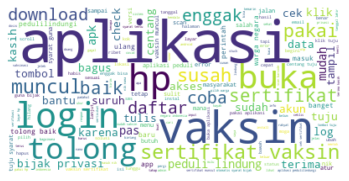

In [55]:
create_wordcloud(SemuaText,"Semua Sentimen")

In [56]:
komenpositif= df_skripsi[df_skripsi['label'] == "Positive"]


In [57]:
Positive = "".join(komenpositif['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

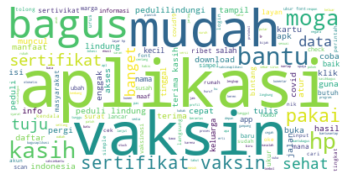

In [58]:
create_wordcloud(Positive,"Semua Positive")

In [59]:
komennegatif= df_skripsi[df_skripsi['label'] == "Negative"]

In [60]:
Negative = "".join(komennegatif['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

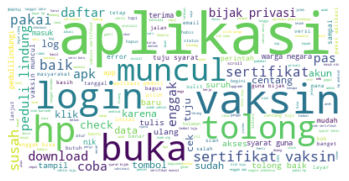

In [61]:
create_wordcloud(Negative,"Semua Negative")